# Import and global variable

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [72]:
import requests

In [73]:
import datetime
now  = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
print(datetime.datetime.now())
print(now)

2021-03-14 12:55:20.437432
20210314_125520


In [74]:
# xl_writer = pd.ExcelWriter(f"covid19_world_data_{now}.xlsx")

# Data

data from https://github.com/CSSEGISandData/COVID-19

or

https://www.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6

# Cases

In [75]:
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"

In [76]:
df_cases = pd.read_csv(url)

In [77]:
# df_cases.to_excel(xl_writer, "raw")

In [78]:
df_cases.drop(columns=['Lat', 'Long'], inplace=True)

In [79]:
df_cases.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/4/21,3/5/21,3/6/21,3/7/21,3/8/21,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,55775,55827,55840,55847,55876,55876,55894,55917,55959,55959
1,NaN,Albania,0,0,0,0,0,0,0,0,...,110521,111301,112078,112897,113580,114209,114840,115442,116123,116821
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,113761,113948,114104,114234,114382,114543,114681,114851,115008,115143
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,10976,10998,11019,11042,11069,11089,11130,11130,11199,11228
4,NaN,Angola,0,0,0,0,0,0,0,0,...,20981,21026,21055,21086,21108,21114,21161,21205,21265,21323


In [80]:
countries = df_cases["Country/Region"].unique()

In [81]:
countries.sort()

In [82]:
countries

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

In [83]:
province = df_cases["Province/State"]

In [84]:
province.dropna(inplace=True)

In [85]:
province = province.unique()

In [86]:
province.sort()

In [87]:
province

array(['Alberta', 'Anguilla', 'Anhui', 'Aruba',
       'Australian Capital Territory', 'Beijing', 'Bermuda',
       'Bonaire, Sint Eustatius and Saba', 'British Columbia',
       'British Virgin Islands', 'Cayman Islands', 'Channel Islands',
       'Chongqing', 'Curacao', 'Diamond Princess',
       'Falkland Islands (Malvinas)', 'Faroe Islands', 'French Guiana',
       'French Polynesia', 'Fujian', 'Gansu', 'Gibraltar',
       'Grand Princess', 'Greenland', 'Guadeloupe', 'Guangdong',
       'Guangxi', 'Guizhou', 'Hainan', 'Hebei', 'Heilongjiang', 'Henan',
       'Hong Kong', 'Hubei', 'Hunan', 'Inner Mongolia', 'Isle of Man',
       'Jiangsu', 'Jiangxi', 'Jilin', 'Liaoning', 'Macau', 'Manitoba',
       'Martinique', 'Mayotte', 'Montserrat', 'New Brunswick',
       'New Caledonia', 'New South Wales', 'Newfoundland and Labrador',
       'Ningxia', 'Northern Territory', 'Northwest Territories',
       'Nova Scotia', 'Nunavut', 'Ontario', 'Prince Edward Island',
       'Qinghai', 'Quebec', 

# Death

In [88]:
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"

In [89]:
df_deaths = pd.read_csv(url)

In [90]:
df_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/4/21,3/5/21,3/6/21,3/7/21,3/8/21,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,2446,2449,2449,2449,2451,2451,2451,2451,2454,2454
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,1876,1897,1918,1939,1956,1969,1986,2002,2018,2030
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,3002,3007,3010,3013,3018,3022,3026,3028,3031,3034
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,112,112,112,112,112,112,112,112,112,112
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,511,511,512,514,515,516,516,517,519,520


In [91]:
df_deaths.drop(columns=['Lat', 'Long'], inplace=True)

# Function Definition

In [92]:
def extract_data(data_frame, country, region=None, groupby=False):
    if groupby:
        s = data_frame[data_frame["Country/Region"] == country].groupby(by=["Country/Region",]).sum().stack().droplevel(level=0)
    else:
        d = data_frame[(data_frame["Country/Region"] == country)]
        if region:
            s = d[d["Province/State"] == region].drop(columns=["Province/State", "Country/Region"]).stack().droplevel(level=0)
        else:
            s = d[d["Province/State"].isna()].drop(columns=["Province/State", "Country/Region"]).stack().droplevel(level=0)
    s.index = pd.to_datetime(s.index)
    df = s.to_frame()
    if region:
        df.columns = [region,]
    else:
        df.columns = [country,]
    df["day_of_year"] = df.index.dayofyear
    df.reset_index(inplace=True)
    df.columns = ['date'] + list(df.columns[1:])
    return df.set_index(['date', 'day_of_year'])

In [93]:
def plot_data(dataframe, logx=False, logy=False, **kwargs):
    if logx:
        df = dataframe.reset_index(level=0, drop=True)
        ax = df.plot(logx=logx, logy=logy, **kwargs)
    else:
        df = dataframe.reset_index(level=1, drop=True)
        ax = df.plot(logy=logy, **kwargs)
    return ax

In [94]:
def add(df1, df2, country):
    if len(df_cases[df_cases["Country/Region"]==country]):
        groupby = True
    else: 
        groupby = False
    # df = pd.concat([extract_data(df1, country), extract_data(df2, country)], axis=1)
    df = pd.concat([extract_data(df1, country, groupby=groupby), extract_data(df2, country, groupby=groupby)], axis=1)
    df.country = country
    df.columns = ["cases", "deaths"]
    return df

In [95]:
def plot_daily(data):
    fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8, 13))
    dataframe = data.copy()
    dataframe.reset_index("day_of_year", drop=True, inplace=True)
    dataframe["cases"].plot(color="r", 
                            title=f"Cases in {data.country}", 
                            legend=True, 
                            label="Cumulative",
                           ax=ax1)
    dataframe["daily_cases"].plot(secondary_y=True, style="co--", rot=0, legend=True, label="Daily", ax=ax1)  
    dataframe["daily_cases_s"].plot(secondary_y=True, color="b", rot=0, legend=True, label="Daily 2", ax=ax1)
    #
    dataframe["deaths"].plot(color="r", 
                            title=f"Deaths in {data.country}", 
                            legend=True, 
                            label="Cumulative",
                           ax=ax2)
    dataframe["daily_death"].plot(secondary_y=True, style="co--", rot=0, legend=True, label="Daily", ax=ax2)  
    dataframe["daily_death_s"].plot(secondary_y=True, color="b", rot=0, legend=True, label="Daily 2", ax=ax2)


# Demography

In [96]:
url2 = "https://www.worldometers.info/geography/countries-of-the-world/"

In [97]:
def get_demographic_data(url):
    res = requests.get(url)
    if res.status_code != 200:
        raise Exception("Can't dowload data")
    else:
        data = pd.read_html(res.text)
        df = data[0]
        if "#" in df.columns:
            df.drop(columns="#", inplace=True)
        return df

In [98]:
df_population = get_demographic_data(url2)

In [99]:
df_population.head()

,Country,Population(2020),Region
0,China,1439323776,Asia
1,India,1380004385,Asia
2,United States,331002651,North America
3,Indonesia,273523615,Asia
4,Pakistan,220892340,Asia


In [100]:
int(df_population.loc[df_population["Country"]=="Switzerland", "Population(2020)"])

8654622

In [101]:
country_conversion = {
    'Burma': 'Myanmar',
    'Congo (Brazzaville)': 'Congo',
    'Congo (Kinshasa)': 'DR Congo',
    "Cote d'Ivoire": "Côte d'Ivoire",
    'Czechia': 'Czech Republic (Czechia)',
    'Korea, South': 'South Korea',
    'Saint Kitts and Nevis': 'Saint Kitts & Nevis',
    'Saint Vincent and the Grenadines': 'St. Vincent & Grenadines',
    'Sao Tome and Principe': 'Sao Tome & Principe',
    'Taiwan*': 'Taiwan, Province of China',
    'US': 'United States',
    'West Bank and Gaza': 'State of Palestine',
}

# Join the cases and the death by countries

In [102]:
by_countries = {}

In [103]:
last_14days = {}

In [104]:
population = {}

In [105]:
for country in countries:
    if country in ('Diamond Princess', 'MS Zaandam'):
        continue
    df_country = add(df_cases, df_deaths, country)
    try:
        df_country.population = int(df_population.loc[df_population["Country"]==country, "Population(2020)"])
        
    except TypeError:
        if country == 'Kosovo':
            df_country.population = 1932774   # CIA world fact
        elif country == 'Taiwan*':
            df_country.population = 23603049  # CIA word fact
        elif country == 'Western Sahara':
            df_country.population =  652271   # CIA word fact            
        else:
            try:
                df_country.population = int(df_population.loc[df_population["Country"]==country_conversion[country], "Population(2020)"])
            except :
                print(country)
    population[country] = df_country.population
    df_country["last 14 days by 100000"] = df_country["cases"].diff(14) * 100000 / df_country.population
    last_14days[country] =  df_country["cases"].tail(15).diff(14).iloc[-1]
    by_countries[country] = df_country

In [106]:
df_last_14days = pd.Series(last_14days).to_frame().reset_index()

In [107]:
df_last_14days.columns = ["country", "cases 14 days"]

In [108]:
df_population2 = pd.Series(population).to_frame().reset_index()

In [109]:
df_population2.columns =  ["country", "population"]

In [110]:
df_summary_cases = pd.DataFrame(df_cases[["Country/Region", df_cases.columns[-1]]].groupby(by="Country/Region").sum().to_records())

In [111]:
df_summary_cases.columns = ["country", "total cases"]

In [112]:
df_summary_deaths = pd.DataFrame(df_deaths[["Country/Region",df_deaths.columns[-1]]].groupby(by="Country/Region").sum().to_records())

In [113]:
df_summary_deaths.columns = ["country", "total deaths"]

In [114]:
df_merge = pd.merge(df_population2, df_summary_cases, on="country", how="inner")

In [115]:
df_merge = pd.merge(df_merge, df_summary_deaths, on="country", how="inner")

In [116]:
df_merge = pd.merge(df_merge, df_last_14days, on="country", how="inner")

In [117]:
df_merge["cases by 100000"] = df_merge["total cases"] * 100000 / df_merge["population"]

In [118]:
df_merge["deaths by 100000"] = df_merge["total deaths"] * 100000 / df_merge["population"]

In [119]:
df_merge["last 14 days by 100000"] =df_merge["cases 14 days"] * 100000 / df_merge["population"]

In [120]:
xl_file = pd.ExcelWriter(f'covid19_Swiss_Criteria_{now}.xlsx')

In [121]:
df_merge.to_excel(xl_file, 'world covid', index=False)

In [122]:
xl_file.close()

In [123]:
def plot_swiss_criteria(countries, figsize=(16, 9)):
    df = by_countries[countries[0]]["last 14 days by 100000"].to_frame()
    df.columns = [countries[0]]
    for n in countries[1:]:
        df_n = by_countries[n]["last 14 days by 100000"].to_frame()
        df_n.columns = [n, ]
        df = pd.concat([df, df_n], axis=1)
    plot_data(df, figsize=figsize)

In [124]:
neighbours = ["Switzerland", "Italy", "France", "Germany", "Austria", "Spain", 
              "Belgium", "Netherlands", "Portugal", 'United Kingdom', 
              # "Ireland"
             ]

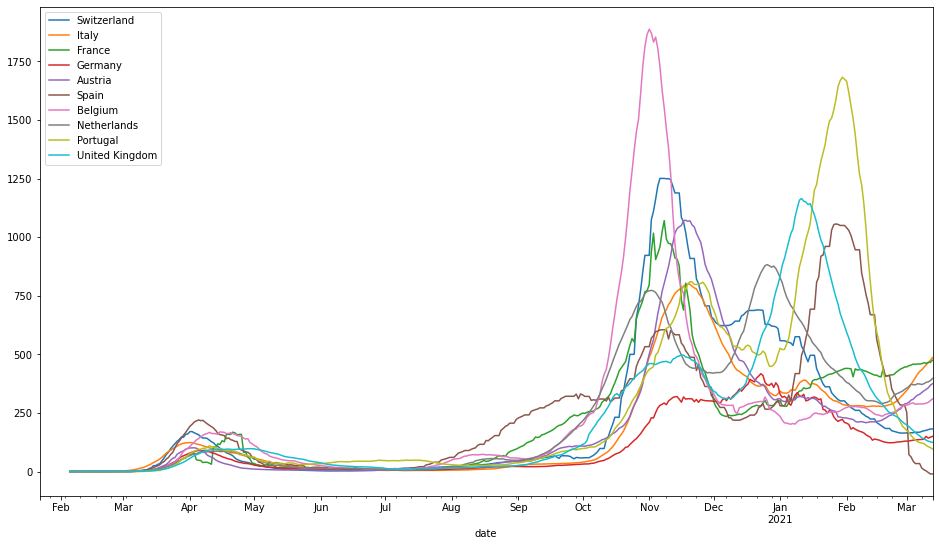

In [125]:
plot_swiss_criteria(neighbours)

In [126]:
north_europe = ["Switzerland", "Sweden", "Denmark", "Norway", "Finland", "Iceland"]

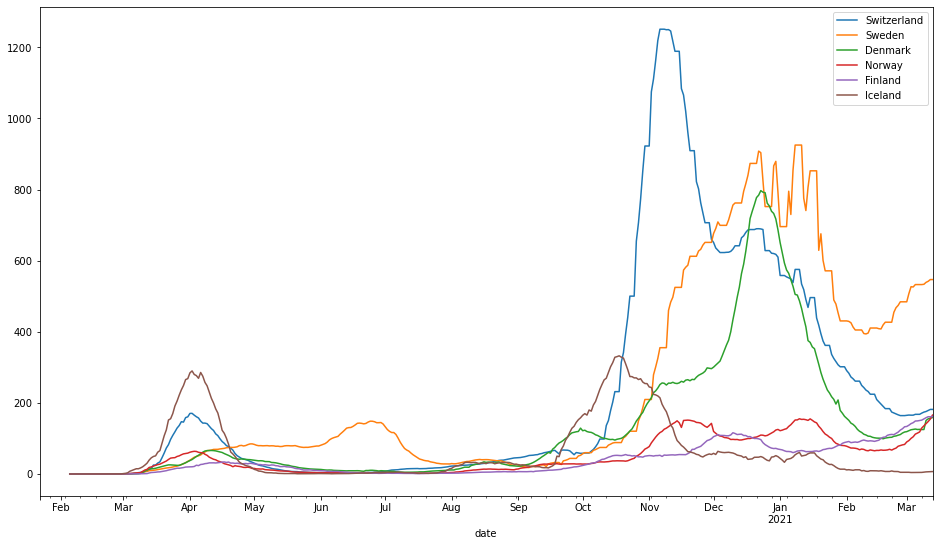

In [127]:
plot_swiss_criteria(north_europe)

In [128]:
northern_europe = ['Denmark','Estonia', 'Finland', 'Iceland', 
                   'Ireland', 'Latvia', 'Lithuania', 'Norway', 'Sweden', 'United Kingdom',
]

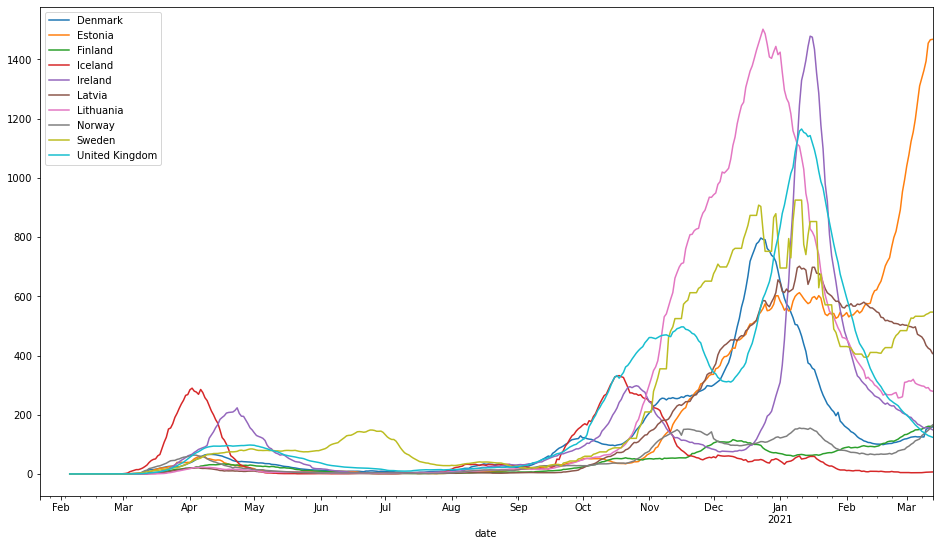

In [129]:
plot_swiss_criteria(northern_europe)

In [130]:
eastern_europe = ["Belarus", "Bulgaria","Czechia","Hungary", 
                  "Moldova", "Poland", "Romania", "Russia", "Slovakia", "Ukraine"]

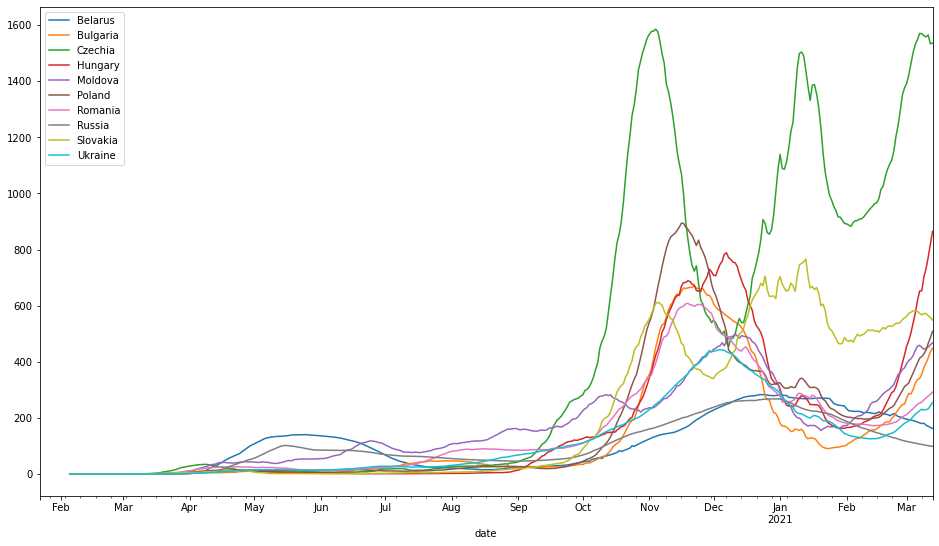

In [131]:
plot_swiss_criteria(eastern_europe)

In [132]:
southern_europe = ['Albania',
# 'Andorra',
'Bosnia and Herzegovina',
'Croatia',
'Greece',
'Italy',
'Malta',
'Montenegro',
'North Macedonia',
'Portugal',
'Serbia',
'Slovenia',
'Spain',
]

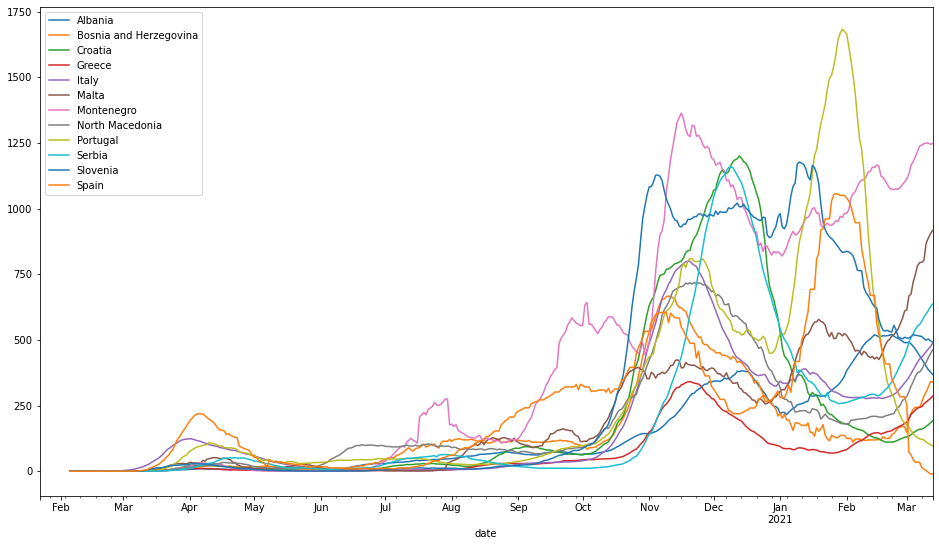

In [133]:
plot_swiss_criteria(southern_europe)

In [134]:
western_europe = ['Austria',
'Belgium',
'France',
'Germany',
'Liechtenstein',
# 'Luxembourg',
# 'Monaco',
'Netherlands',
'Switzerland',
]

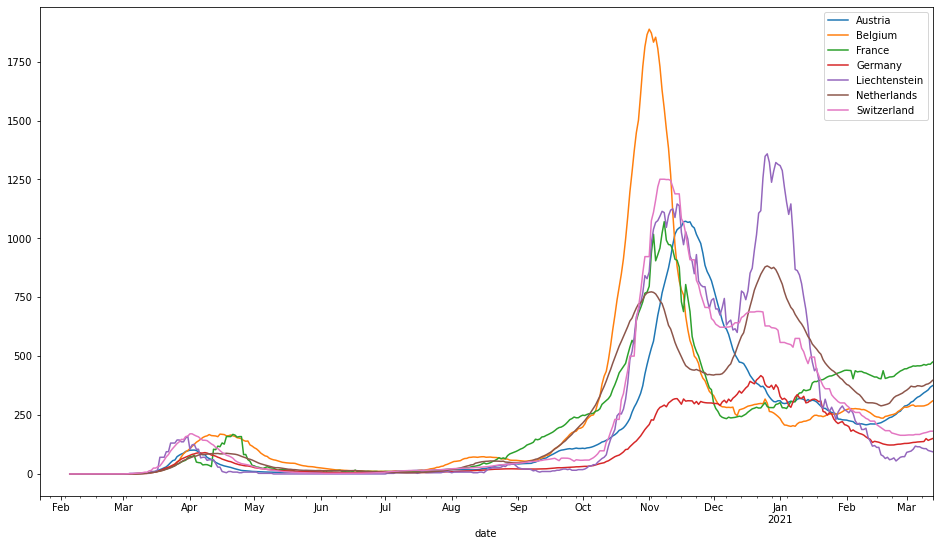

In [135]:
plot_swiss_criteria(western_europe)

In [136]:
north_africa = ['Algeria',
'Egypt',
'Libya',
'Morocco',
'Sudan',
'Tunisia',
# 'Western Sahara',
]

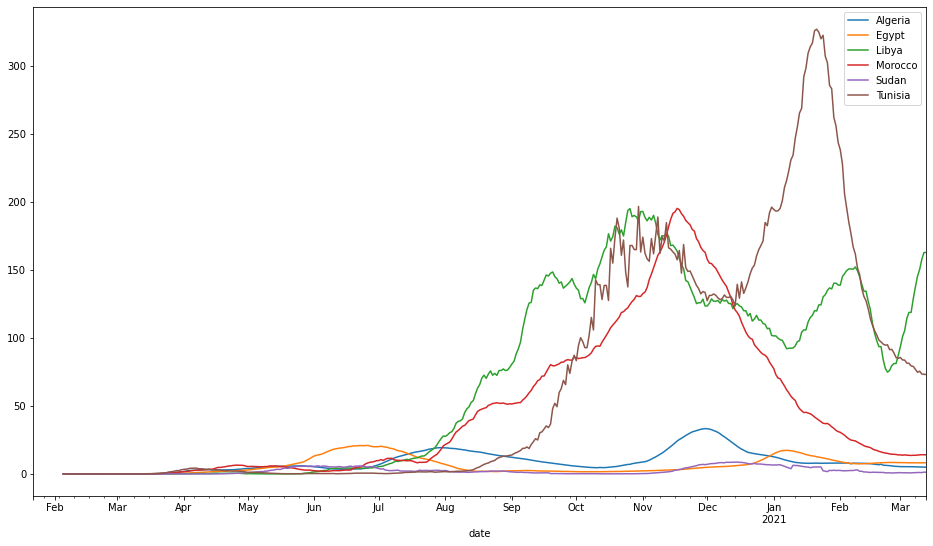

In [137]:
plot_swiss_criteria(north_africa)

In [138]:
countries = list(df_merge[["country", "last 14 days by 100000"]].set_index("country").sort_values(by="last 14 days by 100000", ascending=False).index)

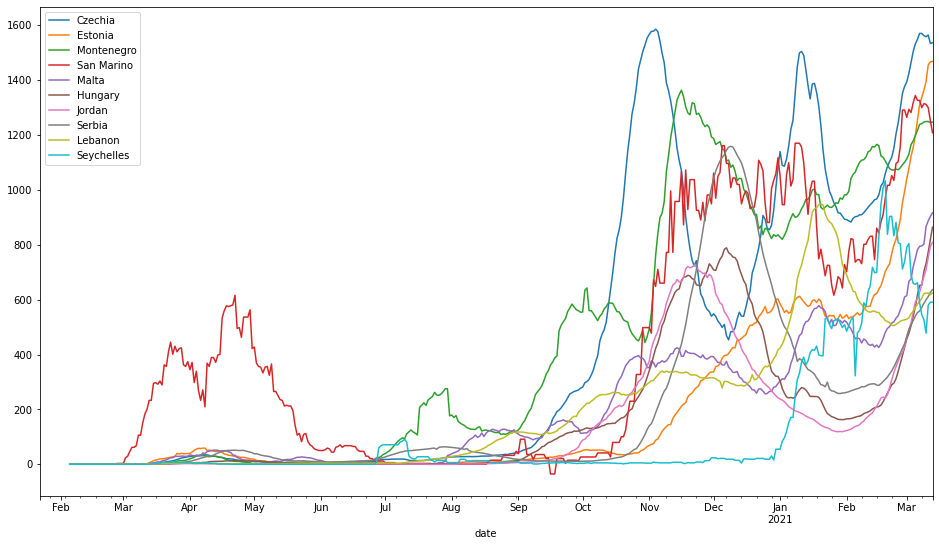

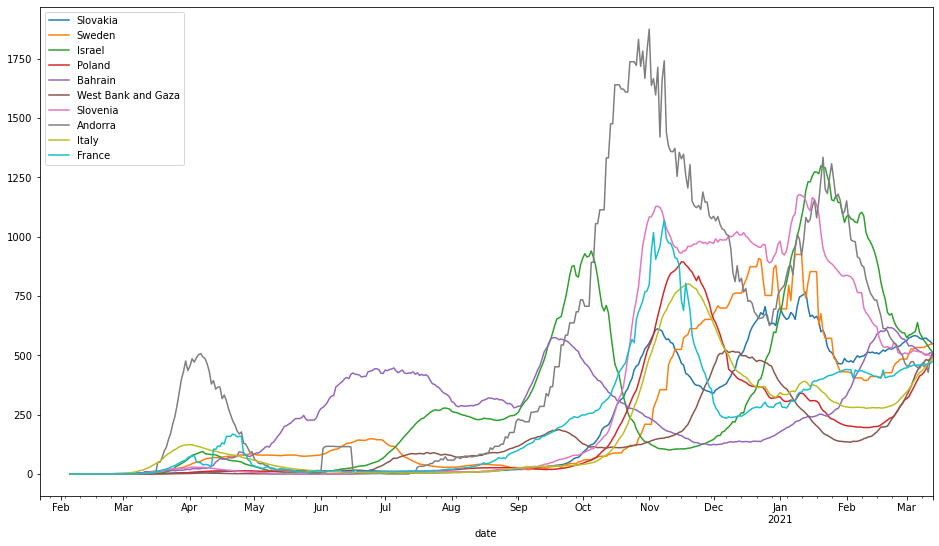

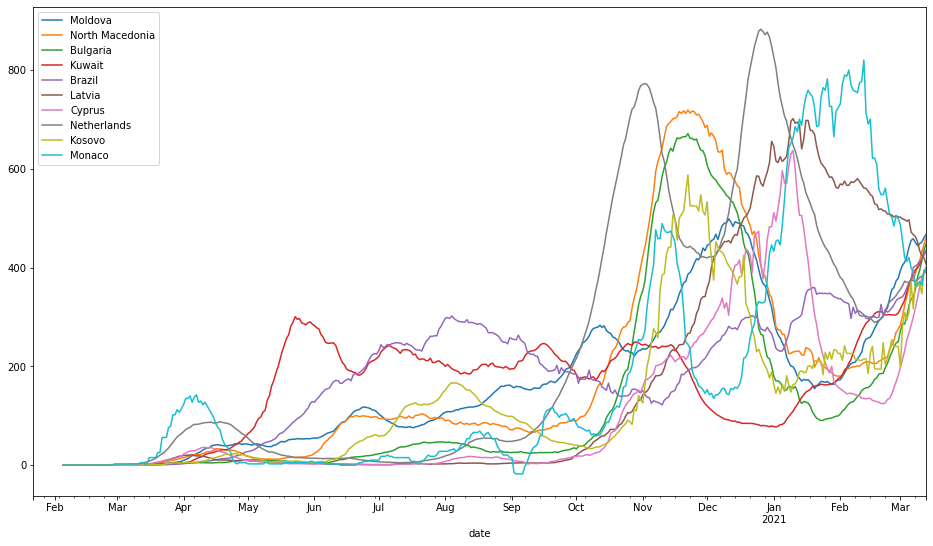

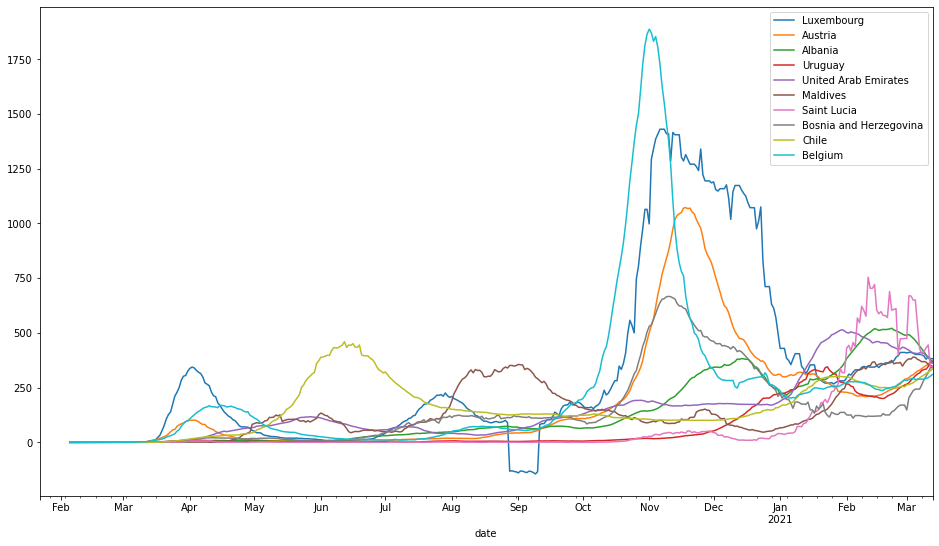

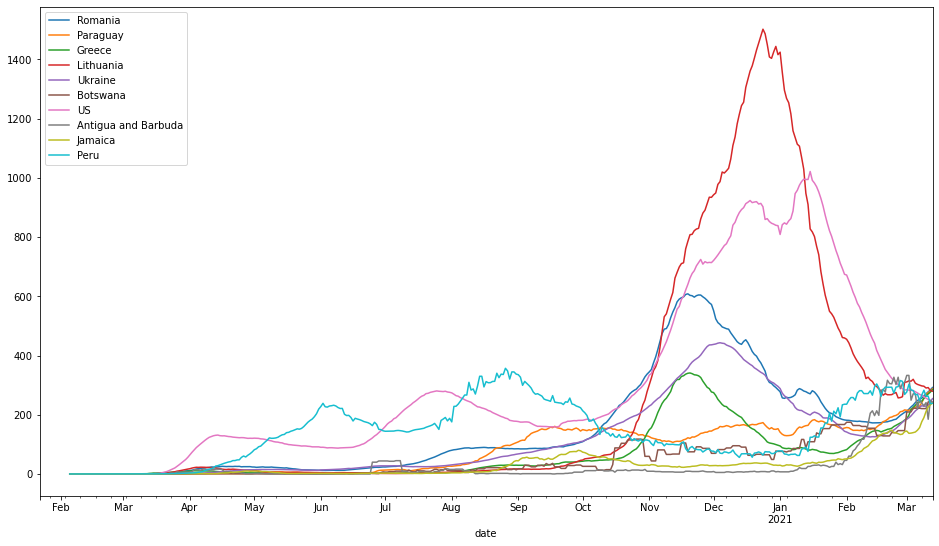

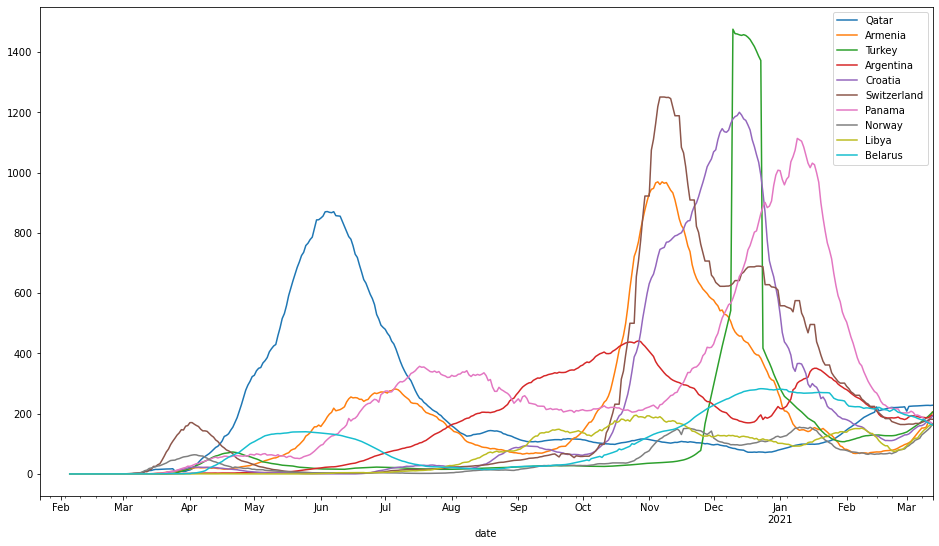

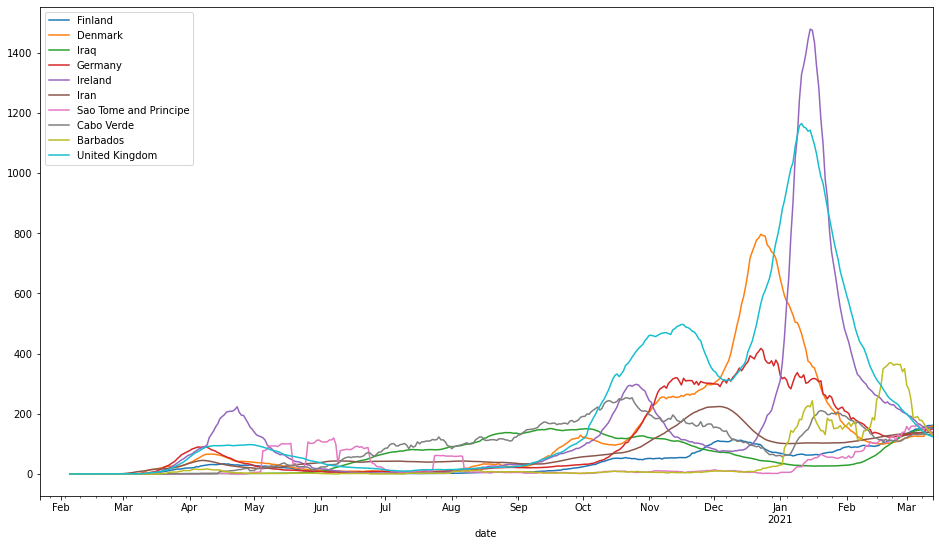

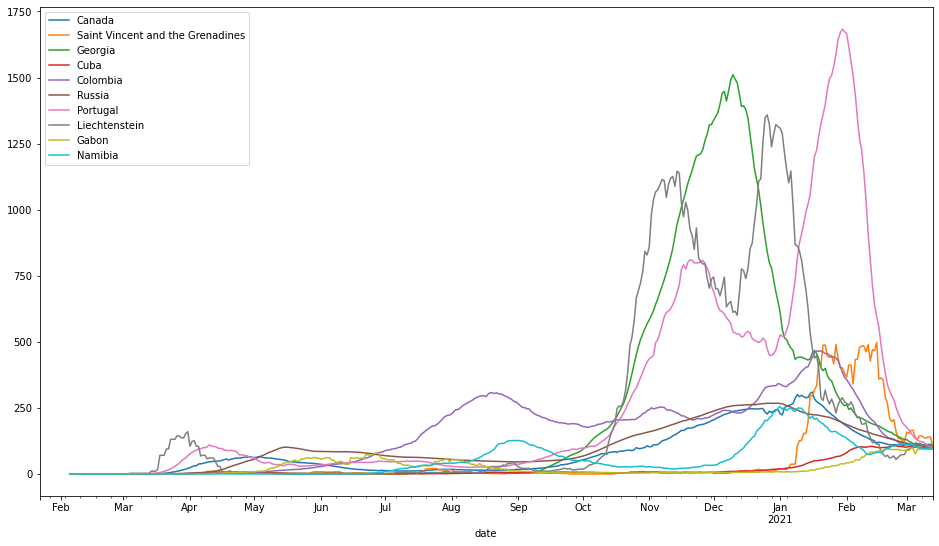

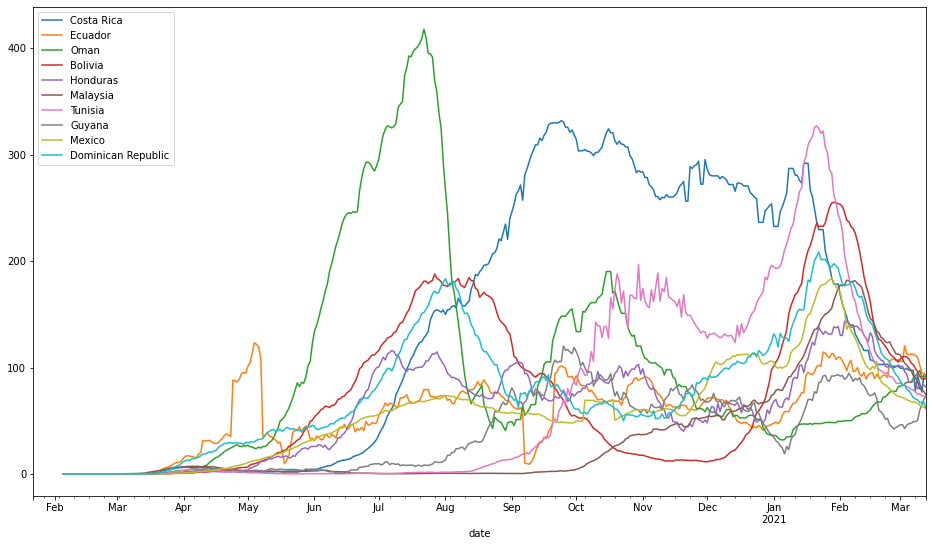

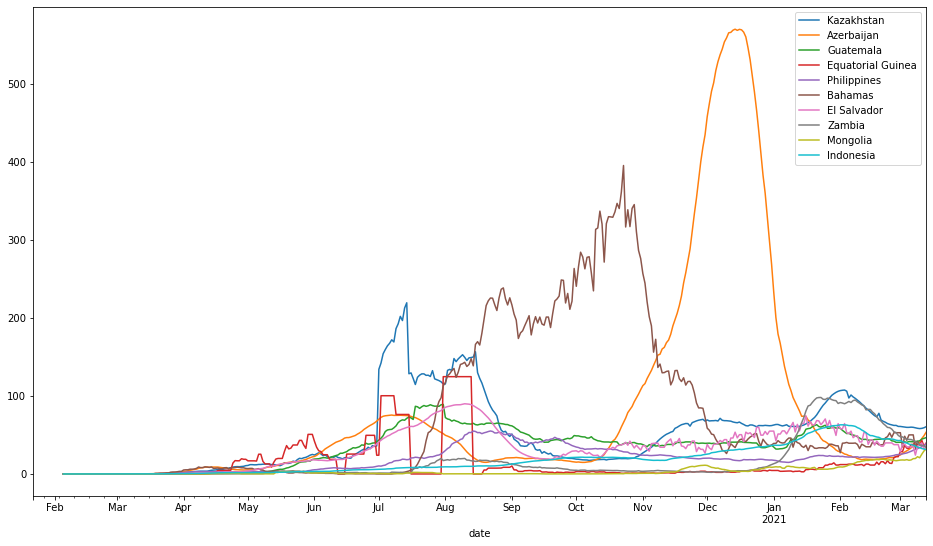

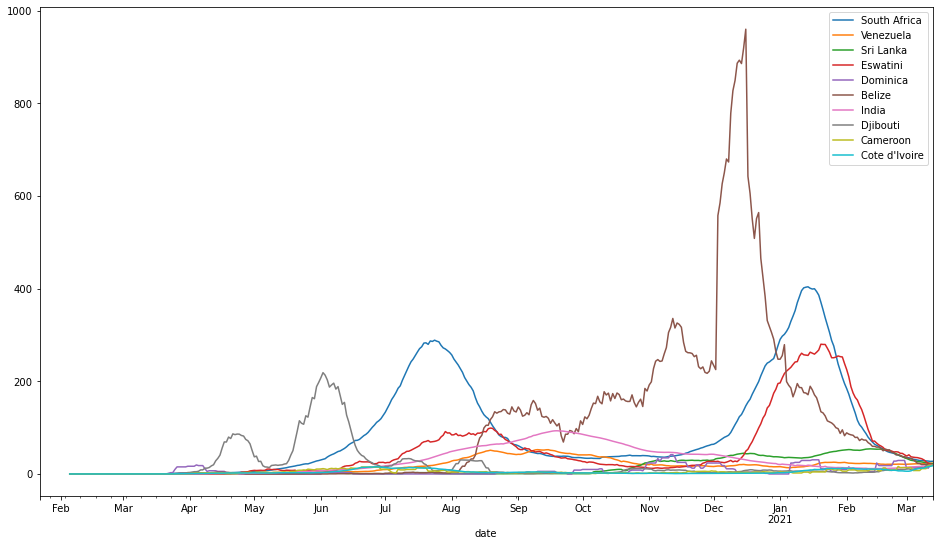

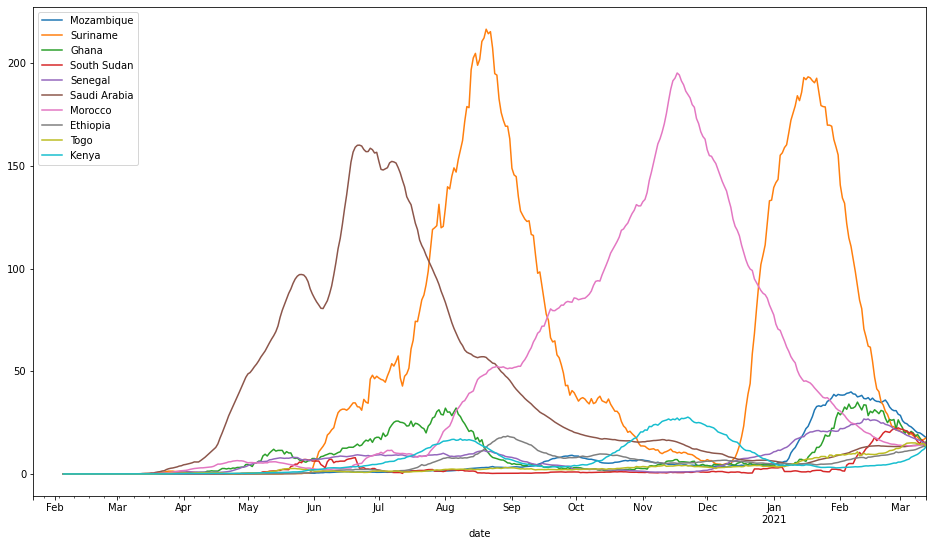

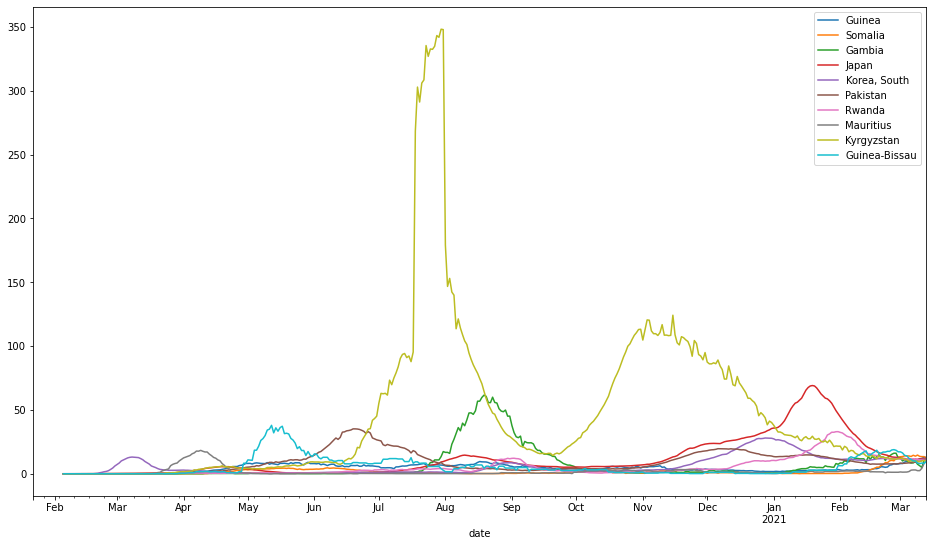

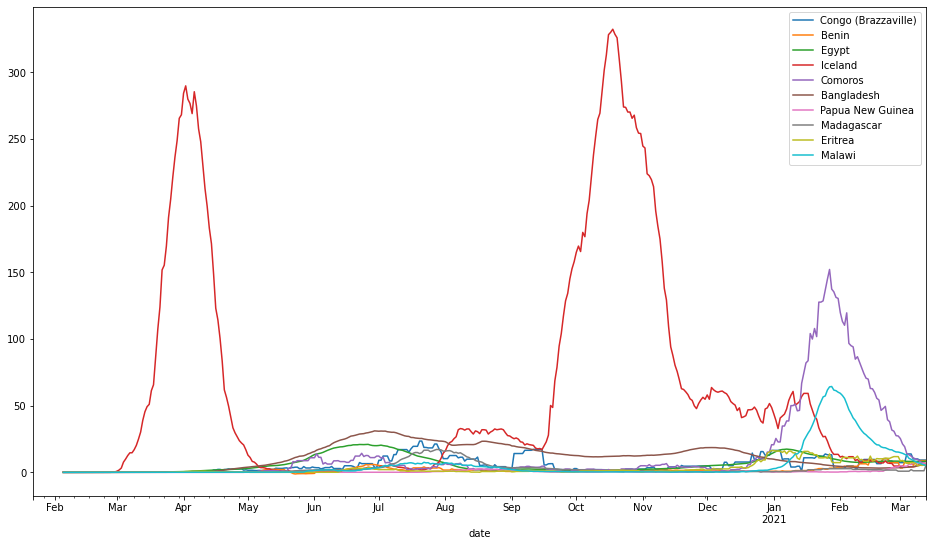

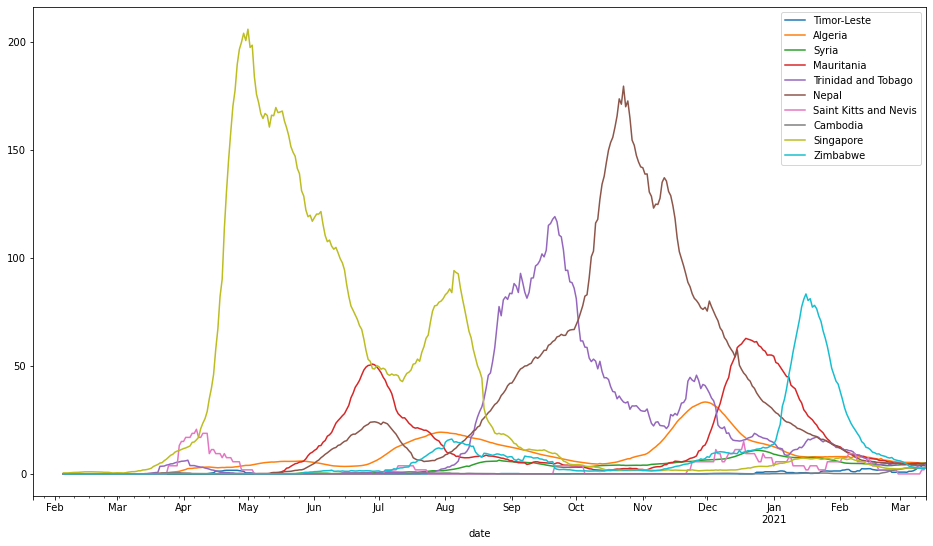

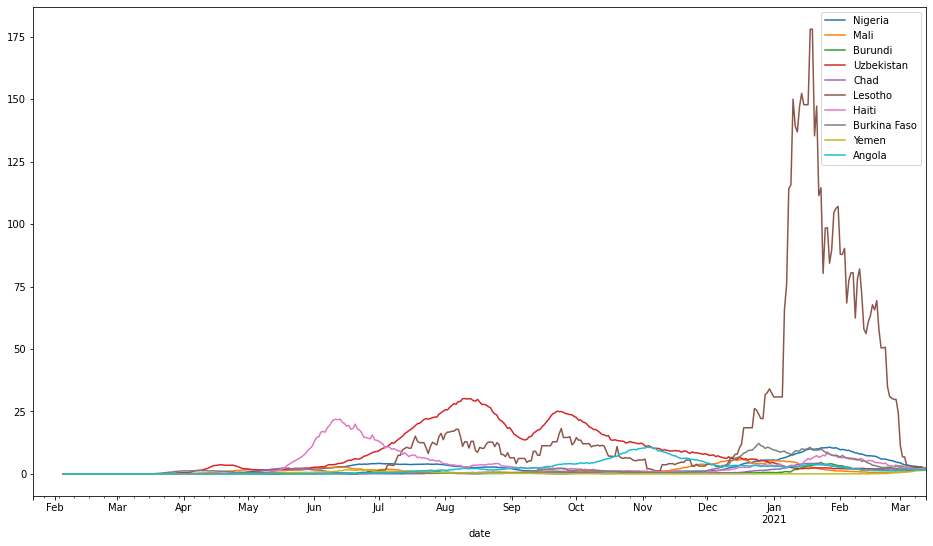

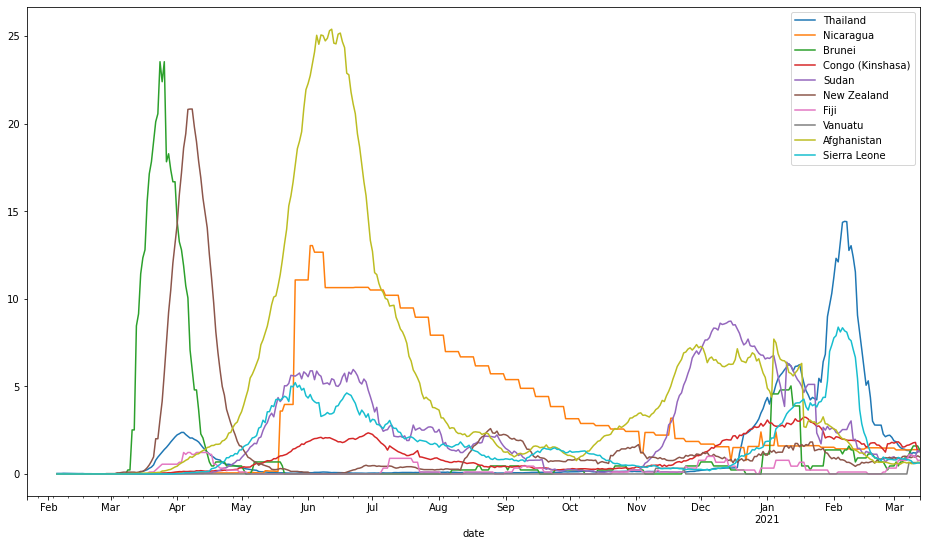

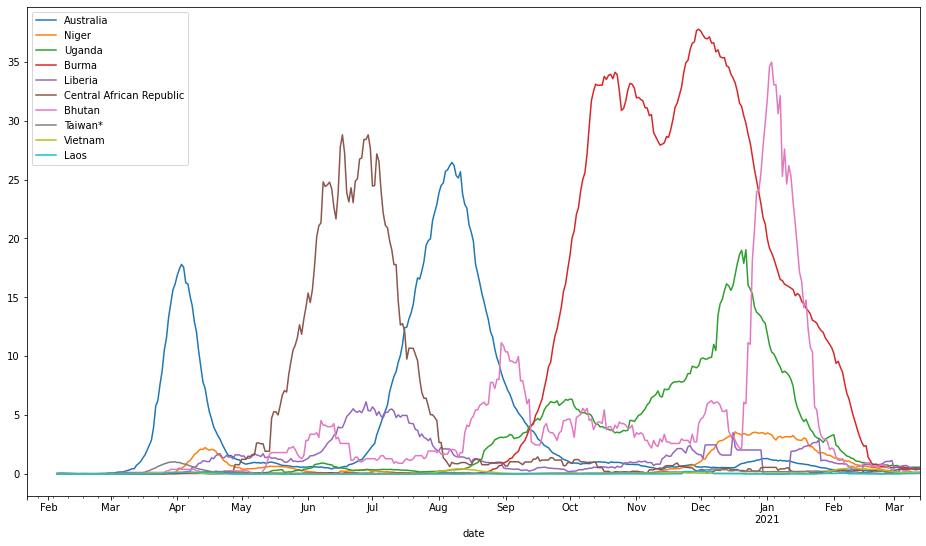

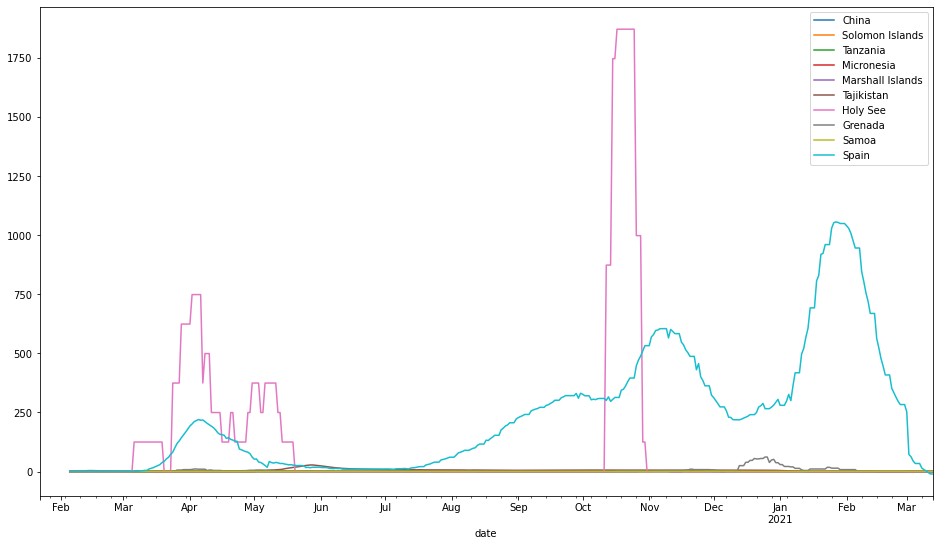

In [139]:
for i in list(range(0, len(countries), 10)): 
    plot_swiss_criteria(countries[i: i+10])

In [140]:
countries

['Czechia',
 'Estonia',
 'Montenegro',
 'San Marino',
 'Malta',
 'Hungary',
 'Jordan',
 'Serbia',
 'Lebanon',
 'Seychelles',
 'Slovakia',
 'Sweden',
 'Israel',
 'Poland',
 'Bahrain',
 'West Bank and Gaza',
 'Slovenia',
 'Andorra',
 'Italy',
 'France',
 'Moldova',
 'North Macedonia',
 'Bulgaria',
 'Kuwait',
 'Brazil',
 'Latvia',
 'Cyprus',
 'Netherlands',
 'Kosovo',
 'Monaco',
 'Luxembourg',
 'Austria',
 'Albania',
 'Uruguay',
 'United Arab Emirates',
 'Maldives',
 'Saint Lucia',
 'Bosnia and Herzegovina',
 'Chile',
 'Belgium',
 'Romania',
 'Paraguay',
 'Greece',
 'Lithuania',
 'Ukraine',
 'Botswana',
 'US',
 'Antigua and Barbuda',
 'Jamaica',
 'Peru',
 'Qatar',
 'Armenia',
 'Turkey',
 'Argentina',
 'Croatia',
 'Switzerland',
 'Panama',
 'Norway',
 'Libya',
 'Belarus',
 'Finland',
 'Denmark',
 'Iraq',
 'Germany',
 'Ireland',
 'Iran',
 'Sao Tome and Principe',
 'Cabo Verde',
 'Barbados',
 'United Kingdom',
 'Canada',
 'Saint Vincent and the Grenadines',
 'Georgia',
 'Cuba',
 'Colombia',
